In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import plotly.graph_objects as go #candlestick chart library
from datetime import datetime

In [ ]:
df=pd.read_csv('/content/EDA DATASET.CSV')

In [ ]:
df.head()

,Unnamed: 0,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,0,11/27/2007,MUNDRAPORT,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687720e+15,9859619.0,0.3612
1,1,11/28/2007,MUNDRAPORT,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312770e+14,1453278.0,0.3172
2,2,11/29/2007,MUNDRAPORT,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550660e+14,1069678.0,0.2088
3,3,11/30/2007,MUNDRAPORT,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283260e+14,1260913.0,0.2735
4,4,12/3/2007,MUNDRAPORT,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,816123.0,0.2741


In [ ]:
#checking outliers of dataset

def check_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return z_scores > threshold
numerical_columns = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume', '%Deliverble']

numerical_data = df[numerical_columns]


outliers = check_outliers_zscore(numerical_data)

print("Rows containing outliers:")
print(df[outliers.any(axis=1)])

print("\nNumber of outliers in each column:")
print(outliers.sum())


In [ ]:
#df.drop(['Trades'],axis=1,inplace=True)

In [ ]:
#df.drop(['Series'],axis=1,inplace=True)

In [ ]:
#df.shape

(235192, 13)

In [ ]:
#dropeddf=df.dropna(inplace=True)
df.shape

(219115, 13)

In [ ]:
df.describe()

,Unnamed: 0,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
count,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,2.191150e+05,2.191150e+05,2.191150e+05,219115.000000
mean,117977.740643,1312.798810,1314.452039,1333.484986,1294.029456,1313.122336,1313.310053,1313.865487,3.210513e+06,1.700616e+14,1.315098e+06,0.502997
std,67974.914980,2646.206042,2650.221844,2684.981456,2611.243954,2646.366636,2647.141818,2647.652264,7.546782e+06,3.387160e+14,2.831670e+06,0.190019
min,0.000000,0.000000,10.200000,10.350000,10.000000,10.150000,10.200000,10.250000,6.000000e+00,2.790000e+07,5.000000e+00,0.023600
25%,58803.500000,294.150000,294.850000,299.800000,289.425000,294.200000,294.350000,294.595000,2.835140e+05,2.139435e+13,1.253830e+05,0.364700
50%,119072.000000,594.000000,595.000000,605.800000,584.000000,594.500000,594.300000,594.960000,1.121892e+06,7.607710e+13,5.017560e+05,0.511000
75%,176607.500000,1285.850000,1286.475000,1305.000000,1266.150000,1286.000000,1286.350000,1286.420000,3.215792e+06,1.969535e+14,1.452233e+06,0.638400
max,235191.000000,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,4.810589e+08,3.560000e+16,2.325307e+08,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219115 entries, 0 to 219114
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          219115 non-null  int64  
 1   Date                219115 non-null  object 
 2   Symbol              219115 non-null  object 
 3   Prev Close          219115 non-null  float64
 4   Open                219115 non-null  float64
 5   High                219115 non-null  float64
 6   Low                 219115 non-null  float64
 7   Last                219115 non-null  float64
 8   Close               219115 non-null  float64
 9   VWAP                219115 non-null  float64
 10  Volume              219115 non-null  int64  
 11  Turnover            219115 non-null  float64
 12  Deliverable Volume  219115 non-null  float64
 13  %Deliverble         219115 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 23.4+ MB


,Unnamed: 0,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
count,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,2.191150e+05,2.191150e+05,2.191150e+05,219115.000000
mean,117977.740643,1312.798810,1314.452039,1333.484986,1294.029456,1313.122336,1313.310053,1313.865487,3.210513e+06,1.700616e+14,1.315098e+06,0.502997
std,67974.914980,2646.206042,2650.221844,2684.981456,2611.243954,2646.366636,2647.141818,2647.652264,7.546782e+06,3.387160e+14,2.831670e+06,0.190019
min,0.000000,0.000000,10.200000,10.350000,10.000000,10.150000,10.200000,10.250000,6.000000e+00,2.790000e+07,5.000000e+00,0.023600
25%,58803.500000,294.150000,294.850000,299.800000,289.425000,294.200000,294.350000,294.595000,2.835140e+05,2.139435e+13,1.253830e+05,0.364700
50%,119072.000000,594.000000,595.000000,605.800000,584.000000,594.500000,594.300000,594.960000,1.121892e+06,7.607710e+13,5.017560e+05,0.511000
75%,176607.500000,1285.850000,1286.475000,1305.000000,1266.150000,1286.000000,1286.350000,1286.420000,3.215792e+06,1.969535e+14,1.452233e+06,0.638400
max,235191.000000,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,4.810589e+08,3.560000e+16,2.325307e+08,1.000000


In [ ]:
#df.to_csv('EDA DATASET.CSV')

In [ ]:
df.isnull().sum()

Unnamed: 0            0
Date                  0
Symbol                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df.isnull().sum()

Unnamed: 0            0
Date                  0
Symbol                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
df.shape
df.describe()

,Unnamed: 0,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
count,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,2.191150e+05,2.191150e+05,2.191150e+05,219115.000000
mean,117977.740643,1312.798810,1314.452039,1333.484986,1294.029456,1313.122336,1313.310053,1313.865487,3.210513e+06,1.700616e+14,1.315098e+06,0.502997
std,67974.914980,2646.206042,2650.221844,2684.981456,2611.243954,2646.366636,2647.141818,2647.652264,7.546782e+06,3.387160e+14,2.831670e+06,0.190019
min,0.000000,0.000000,10.200000,10.350000,10.000000,10.150000,10.200000,10.250000,6.000000e+00,2.790000e+07,5.000000e+00,0.023600
25%,58803.500000,294.150000,294.850000,299.800000,289.425000,294.200000,294.350000,294.595000,2.835140e+05,2.139435e+13,1.253830e+05,0.364700
50%,119072.000000,594.000000,595.000000,605.800000,584.000000,594.500000,594.300000,594.960000,1.121892e+06,7.607710e+13,5.017560e+05,0.511000
75%,176607.500000,1285.850000,1286.475000,1305.000000,1266.150000,1286.000000,1286.350000,1286.420000,3.215792e+06,1.969535e+14,1.452233e+06,0.638400
max,235191.000000,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,4.810589e+08,3.560000e+16,2.325307e+08,1.000000


DATA ANALSIS

In [ ]:
STOCK1=df[df['Symbol']==	'HDFCBANK']
STOCK2=df[df['Symbol']==	'ICICIBANK']
STOCK3=df[df['Symbol']==	'KOTAKBANK']


In [ ]:
STOCK1.head()


,Unnamed: 0,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
74631,80863,1/1/2002,HDFCBANK,225.60,228.0,230.00,222.75,226.00,225.05,225.02,58641,1.319540e+12,46718.0,0.7967
74632,80864,1/2/2002,HDFCBANK,225.05,224.0,225.75,223.00,225.00,225.00,224.53,62109,1.394560e+12,56233.0,0.9054
74633,80865,1/3/2002,HDFCBANK,225.00,225.0,227.95,222.20,227.75,226.25,224.70,49582,1.114110e+12,38261.0,0.7717
74634,80866,1/4/2002,HDFCBANK,226.25,225.0,228.00,223.50,223.75,223.95,224.49,21331,4.788540e+11,10730.0,0.5030
74635,80867,1/7/2002,HDFCBANK,223.95,224.0,226.35,221.55,224.15,223.95,223.79,81273,1.818810e+12,72188.0,0.8882


In [ ]:
STOCK2.head()

,Unnamed: 0,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
93797,102087,1/1/2002,ICICIBANK,88.7,89.95,89.95,87.30,88.05,88.50,88.53,47087,4.168730e+11,35559.0,0.7552
93798,102088,1/2/2002,ICICIBANK,88.5,88.00,89.00,87.50,87.60,88.40,88.05,70982,6.249910e+11,64128.0,0.9034
93799,102089,1/3/2002,ICICIBANK,88.4,86.60,92.95,86.60,92.05,92.00,90.40,143055,1.293280e+12,114325.0,0.7992
93800,102090,1/4/2002,ICICIBANK,92.0,92.50,93.20,90.00,91.90,91.10,91.43,89792,8.209560e+11,73659.0,0.8203
93801,102091,1/7/2002,ICICIBANK,91.1,91.00,92.50,89.25,91.05,90.15,90.58,151344,1.370890e+12,123531.0,0.8162


In [ ]:
STOCK3.head()

,Unnamed: 0,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
122070,132294,4/21/2003,KOTAKBANK,146.25,149.90,155.95,142.5,154.05,155.20,152.49,10046,1.531930e+11,7010.0,0.6978
122071,132295,4/22/2003,KOTAKBANK,155.20,155.30,155.30,148.4,148.50,149.00,151.00,5411,8.170536e+10,2943.0,0.5439
122072,132296,4/23/2003,KOTAKBANK,149.00,149.65,158.75,148.0,149.00,149.15,153.82,37304,5.738110e+11,10529.0,0.2822
122073,132297,4/24/2003,KOTAKBANK,149.15,151.05,152.00,145.8,147.35,146.30,149.05,17140,2.554780e+11,7357.0,0.4292
122074,132298,4/25/2003,KOTAKBANK,146.30,147.75,147.80,145.1,145.90,145.65,146.13,5212,7.616054e+10,3048.0,0.5848


In [ ]:
#setting date as index values

STOCK1['Date']=pd.to_datetime(STOCK1['Date'])
STOCK1.set_index(['Date'],drop=False,inplace=True)

STOCK2['Date']=pd.to_datetime(STOCK2['Date'])
STOCK2.set_index(['Date'],drop=False,inplace=True)

STOCK3['Date']=pd.to_datetime(STOCK3['Date'])
STOCK3.set_index(['Date'],drop=False,inplace=True)

<ipython-input-5-cf8982791648>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  STOCK1['Date']=pd.to_datetime(STOCK1['Date'])
<ipython-input-5-cf8982791648>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  STOCK2['Date']=pd.to_datetime(STOCK2['Date'])
<ipython-input-5-cf8982791648>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
#CREATING A NEW DATAFRAME WHICH HAVE ONLY DATA OF TWO YEAR
S1=STOCK1.loc['2020-01-01':'2021-01-01']
S2=STOCK2.loc['2020-01-01':'2021-01-01']
S3=STOCK3.loc['2020-01-01':'2021-01-01']

In [ ]:
S3.head()

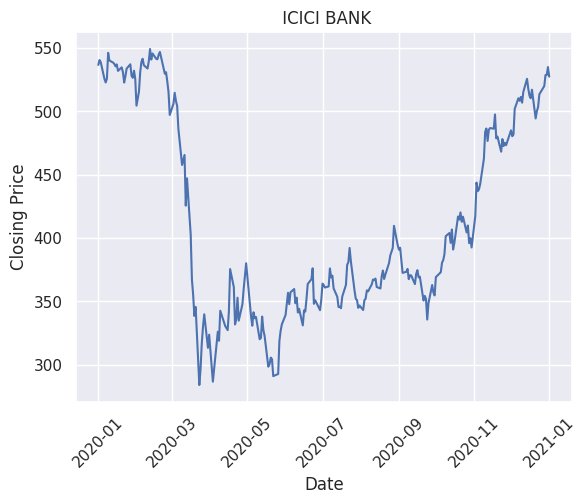

In [ ]:
#1. Plotting the closing prices over time
data=S2
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(' ICICI BANK')
plt.xticks(rotation=45)
plt.show()

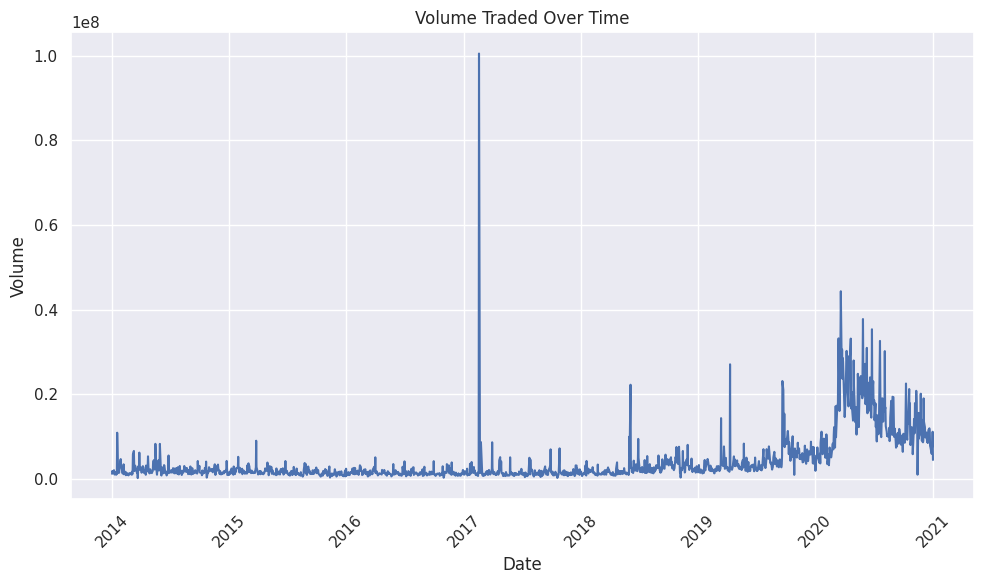

In [ ]:
#2.  Plotting the volume traded over time
data=S1
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Traded Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#what is stock price when sudden volume hike
S1.iloc[[S1['Volume'].argmax()]]

,Unnamed: 0,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2017-02-17,84633,2017-02-17,HDFCBANK,1327.9,1445.0,1454.0,1360.45,1375.0,1377.05,1418.39,100564990,1.430000e+16,66696831.0,0.6632


In [ ]:

selected_data = S1[['Volume', 'Close']]

# Calculate the correlation between "Volume" and "Close"
correlation = selected_data['Volume'].corr(selected_data['Close'])

print("The correlation is ",correlation)

The correlation is  -0.5910943654395647


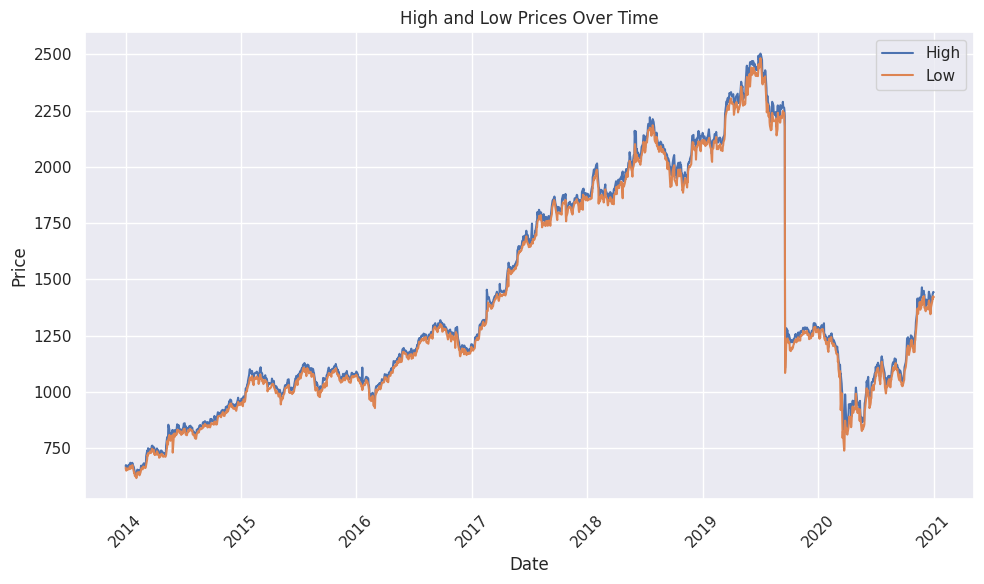

In [ ]:
#3. Creating a line plot of the high and low prices over time
data=S1
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['High'], label='High')
plt.plot(data['Date'], data['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('High and Low Prices Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


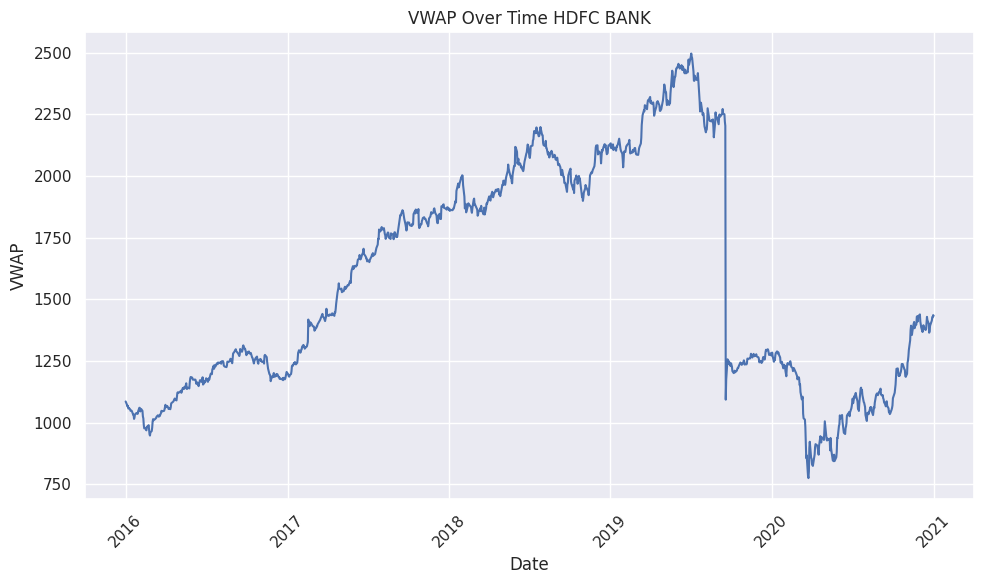

In [ ]:
#4. Creating a line plot of VWAP (Volume Weighted Average Price) over time
data=S1
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['VWAP'])
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.title('VWAP OF HDFC BANK')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#5.Create a candlestick chart
data=S3
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.update_layout(title='Candlestick Chart for KOTAK BANK',
                  yaxis_title='Price',
                  xaxis_title='Date',
                  xaxis_rangeslider_visible=False)

fig.show()

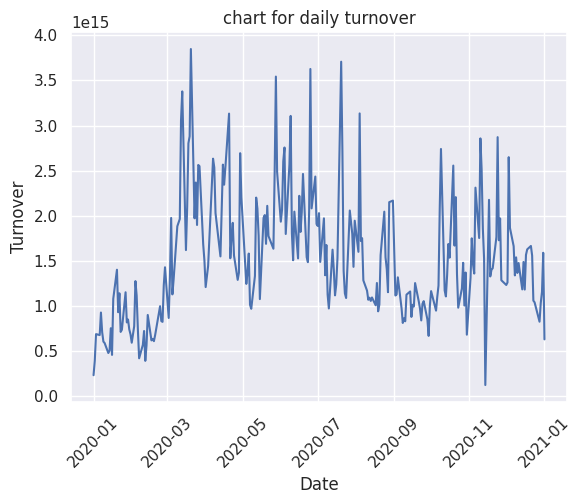

In [ ]:
#8.Chart of Daily Turnover:
data=S1
plt.plot(data['Date'],data['Turnover'])
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.title('chart for daily turnover')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
#8.candlestick chart for hdfc bank
data=S3
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.update_layout(title='Candlestick Chart for KOTAK bank', xaxis_rangeslider_visible=False)
fig.show()

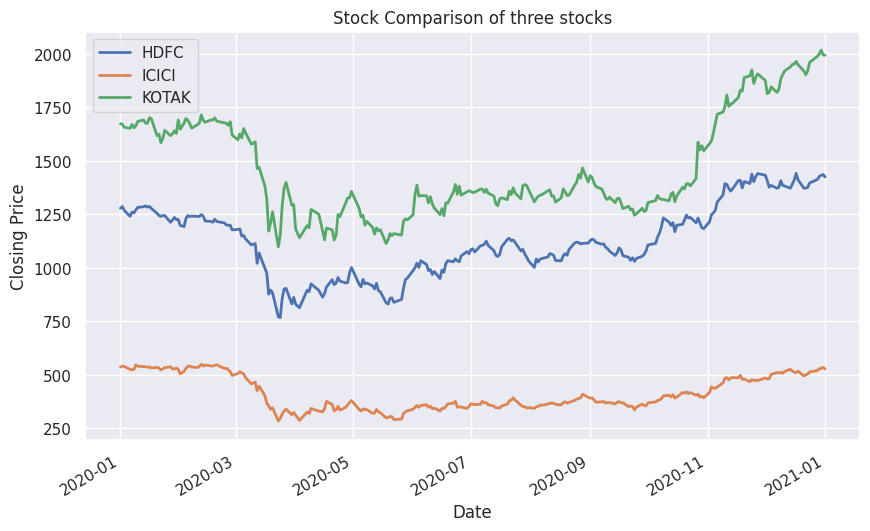

In [ ]:
#9.COMPARISION OF  THREE STOCKS
data1=S1
data2=S2
data3=S3
merged_data = pd.concat([data1['Close'], data2['Close'], data3['Close']], axis=1)
merged_data.columns = ['HDFC', 'ICICI', 'KOTAK']
merged_data.plot(figsize=(10, 6), linewidth=2)


plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Comparison of three stocks')
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
STOCK4=df[df['Symbol']=='ZEEL']
STOCK4.head()


,Unnamed: 0,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
215605,231682,2/28/2007,ZEEL,238.35,230.0,241.90,210.5,232.50,235.35,232.84,2481079,5.777050e+13,1760261.0,0.7095
215606,231683,3/1/2007,ZEEL,235.35,235.0,237.90,222.0,226.50,224.90,224.80,1784382,4.011240e+13,1269185.0,0.7113
215607,231684,3/2/2007,ZEEL,224.90,228.8,229.95,221.2,222.00,222.20,224.70,1656992,3.723220e+13,890257.0,0.5373
215608,231685,3/5/2007,ZEEL,222.20,220.0,229.00,208.0,220.55,217.85,212.83,1958025,4.167330e+13,1600050.0,0.8172
215609,231686,3/6/2007,ZEEL,217.85,225.0,229.00,215.5,225.80,224.35,220.02,1433199,3.153340e+13,942609.0,0.6577


In [ ]:
STOCK4['Date']=pd.to_datetime(STOCK4['Date'])
STOCK4.set_index(['Date'],drop=False,inplace=True)
S4=STOCK4.loc['2016-01-01':'2021-01-01']

<ipython-input-19-fb475ebc08b3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



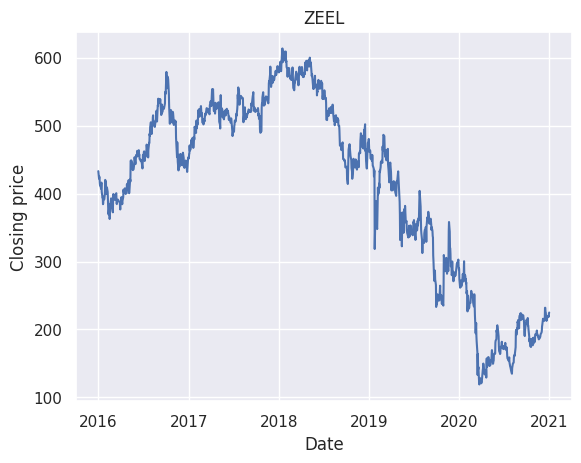

In [ ]:
#9. ZEEL stock price
data=S4
plt.plot(data['Date'],data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('ZEEL')
plt.show()

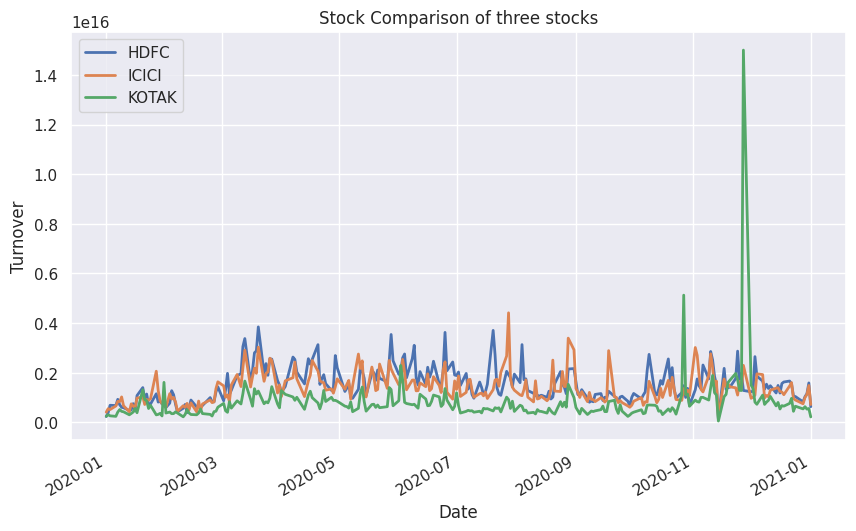

In [ ]:
#10.comparison of three stocks based on turnover COMPARISION OF  THREE STOCKS
data1=S1
data2=S2
data3=S3
merged_data = pd.concat([data1['Turnover'], data2['Turnover'], data3['Turnover']], axis=1)
merged_data.columns = ['HDFC', 'ICICI', 'KOTAK']
merged_data.plot(figsize=(10, 6), linewidth=2)


plt.xlabel('Date')
plt.ylabel('Turnover')
plt.title('Stock Comparison of three stocks')
plt.grid(True)

# Display the plot
plt.show()

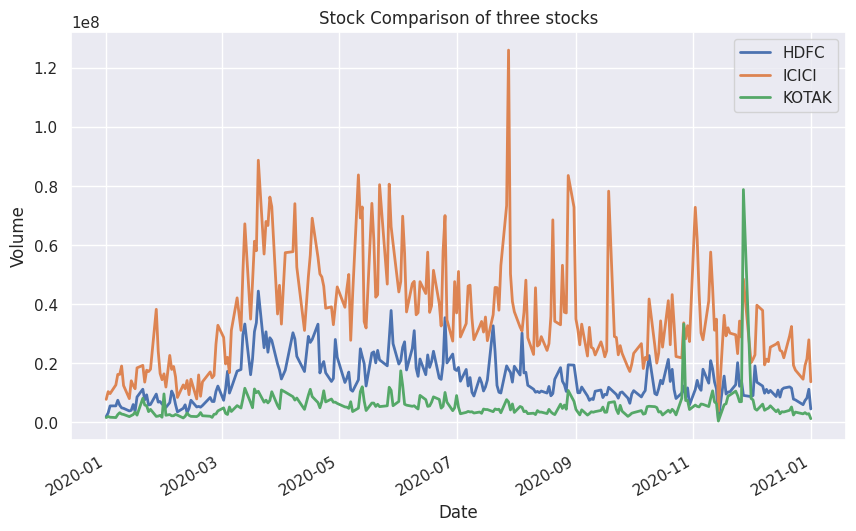

In [ ]:
#10.comparison of three stocks based on VOLUME
#9.COMPARISION OF  THREE STOCKS
data1=S1
data2=S2
data3=S3
merged_data = pd.concat([data1['Volume'], data2['Volume'], data3['Volume']], axis=1)
merged_data.columns = ['HDFC', 'ICICI', 'KOTAK']
merged_data.plot(figsize=(10, 6), linewidth=2)


plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Comparison of three stocks')
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
#10. MOST VALUBLE STOCK
S1['Total Traded']=S1['Open']*S1['Volume']
S2['Total Traded']=S2['Open']*S2['Volume']
S3['Total Traded']=S3['Open']*S3['Volume']

<ipython-input-22-7df8d20e2354>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-7df8d20e2354>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-7df8d20e2354>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Total Traded')

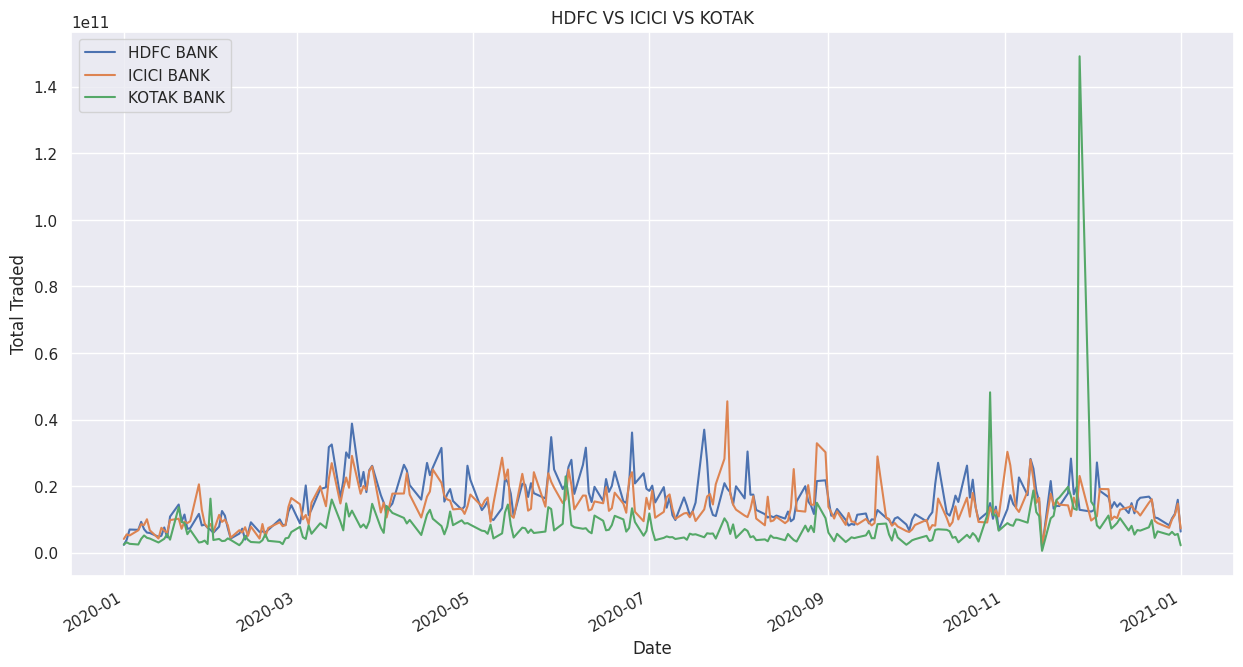

In [ ]:
S1['Total Traded'].plot(label='HDFC BANK',figsize=(15,8))
S2['Total Traded'].plot(label='ICICI BANK')
S3['Total Traded'].plot(label='KOTAK BANK')
plt.legend()
plt.title('HDFC VS ICICI VS KOTAK')
plt.xlabel('Date')
plt.ylabel('Total Traded')



In [ ]:
#11.daily return
S1['Returns']=(S1['Close']/S1['Close'].shift(1))-1
S2['Returns']=(S2['Close']/S2['Close'].shift(1))-1
S3['Returns']=(S3['Close']/S3['Close'].shift(1))-1

<ipython-input-24-65649cdc4425>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-65649cdc4425>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-65649cdc4425>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
S1.head()

Text(0.5, 1.0, 'Volatility ')

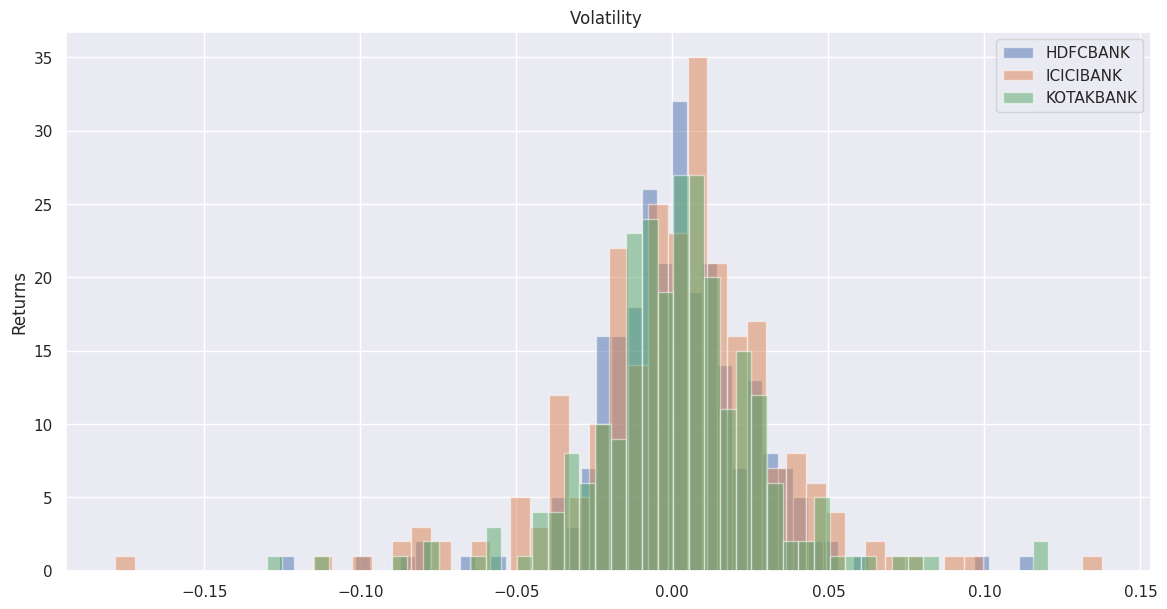

In [ ]:
S1['Returns'].hist(bins=50,label='HDFCBANK',alpha=0.5,figsize=(14,7))
S2['Returns'].hist(bins=50,label='ICICIBANK',alpha=0.5)
S3['Returns'].hist(bins=50,label='KOTAKBANK',alpha=0.5)
plt.legend()
plt.ylabel('Returns')
plt.title('Volatility ')


In [ ]:
df.head()

,Unnamed: 0,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,0,11/27/2007,MUNDRAPORT,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687720e+15,9859619.0,0.3612
1,1,11/28/2007,MUNDRAPORT,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312770e+14,1453278.0,0.3172
2,2,11/29/2007,MUNDRAPORT,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550660e+14,1069678.0,0.2088
3,3,11/30/2007,MUNDRAPORT,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283260e+14,1260913.0,0.2735
4,4,12/3/2007,MUNDRAPORT,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,816123.0,0.2741


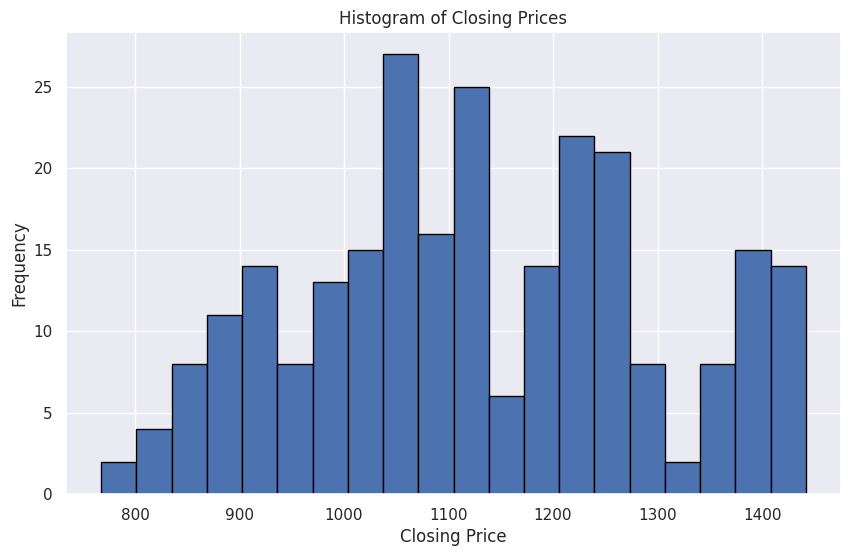

In [ ]:
#12.HISTOGRAM FOR CLOSING PRICE OF HDFC BANK
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))


plt.hist(S1['Close'], bins=20, edgecolor='black')

plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Prices')

plt.show()


<ipython-input-37-3273e827e0be>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-3273e827e0be>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



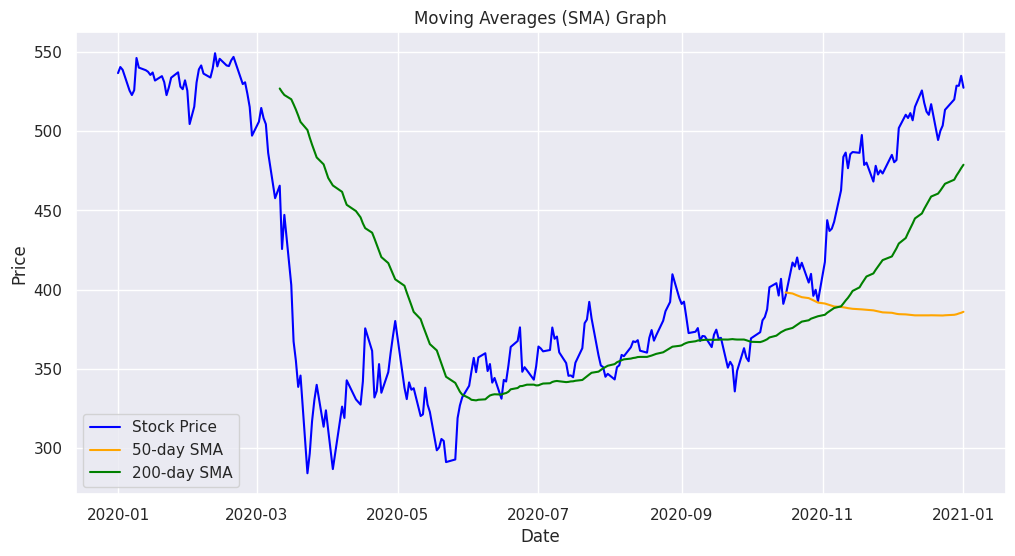

In [ ]:
#13.SIMPLE MOVING AVERAGE
import pandas as pd
import matplotlib.pyplot as plt

S2.index = pd.to_datetime(S2.index)

# Calculate the 50-day and 200-day Simple Moving Averages (SMA)
S2['SMA_50'] = S2['Close'].rolling(window=50).mean()
S2['SMA_200'] = S2['Close'].rolling(window=200).mean()


plt.figure(figsize=(12, 6))  # Optional: Set the figure size
plt.plot(S2.index, S2['Close'], label='Stock Price', color='blue')
plt.plot(S2.index, S2['SMA_200'], label='50-day SMA', color='orange')
plt.plot(S2.index, S2['SMA_50'], label='200-day SMA', color='green')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages (SMA) Graph')
plt.legend()


plt.show()


In [ ]:
%pip install scipy

In [ ]:
%pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=a6784c919e95fad46bcbe9914fb3f2b7194106ab1daefe1d353518e8b0d73276
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


<ipython-input-43-566ae55c1450>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



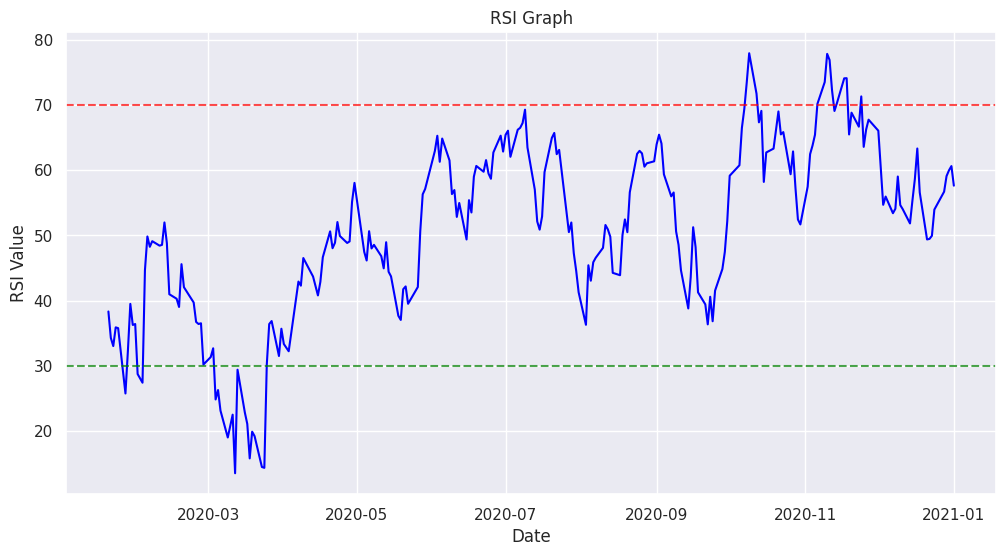

In [ ]:
#14.RSI INDICATOR FOR HDFC BANK
import pandas as pd
import matplotlib.pyplot as plt
import ta

S1['Date'] = pd.to_datetime(S1['Date'])
S1 = S1.set_index('Date')  # Set 'Date' as the index if not already done

# Calculate the RSI values
rsi = ta.momentum.RSIIndicator(close=S1['Close'])
S1['RSI'] = rsi.rsi()

# Plot the RSI graph
plt.figure(figsize=(12, 6))  # Optional: Set the figure size
plt.plot(S1.index, S1['RSI'], label='RSI', color='blue')
plt.axhline(y=70, color='red', linestyle='--', alpha=0.7)  # Optional: Add overbought threshold
plt.axhline(y=30, color='green', linestyle='--', alpha=0.7)  # Optional: Add oversold threshold
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.title('RSI Graph')

plt.show()


In [ ]:
df.describe()

,Unnamed: 0,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
count,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,2.191150e+05,2.191150e+05,2.191150e+05,219115.000000
mean,117977.740643,1312.798810,1314.452039,1333.484986,1294.029456,1313.122336,1313.310053,1313.865487,3.210513e+06,1.700616e+14,1.315098e+06,0.502997
std,67974.914980,2646.206042,2650.221844,2684.981456,2611.243954,2646.366636,2647.141818,2647.652264,7.546782e+06,3.387160e+14,2.831670e+06,0.190019
min,0.000000,0.000000,10.200000,10.350000,10.000000,10.150000,10.200000,10.250000,6.000000e+00,2.790000e+07,5.000000e+00,0.023600
25%,58803.500000,294.150000,294.850000,299.800000,289.425000,294.200000,294.350000,294.595000,2.835140e+05,2.139435e+13,1.253830e+05,0.364700
50%,119072.000000,594.000000,595.000000,605.800000,584.000000,594.500000,594.300000,594.960000,1.121892e+06,7.607710e+13,5.017560e+05,0.511000
75%,176607.500000,1285.850000,1286.475000,1305.000000,1266.150000,1286.000000,1286.350000,1286.420000,3.215792e+06,1.969535e+14,1.452233e+06,0.638400
max,235191.000000,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,4.810589e+08,3.560000e+16,2.325307e+08,1.000000


In [ ]:
#15.PREDICTING THE NEXT CLOSE PRICE FOR ICICI BANK USING LINEAR REGRESSION
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Select the features (independent variables) and the target variable (dependent variable)
features = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume', '%Deliverble']
target = 'Close'

X = S1[features]
y = S1[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predict the next price using the last row in the dataset as input
last_row = X.tail(1)
next_price_prediction = model.predict(last_row)
print("Predicted Next Price:", next_price_prediction[0])


Mean Squared Error: 7.1108067630615865
R-squared: 0.9997161779771621
Predicted Next Price: 1426.07866494067


In [ ]:
S1.tail()

,Unnamed: 0,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-12-28,85587,2020-12-28,HDFCBANK,1397.10,1405.00,1421.00,1404.00,1415.80,1412.85,1414.43,5849597,8.273860e+14,3298640.0,0.5639
2020-12-29,85588,2020-12-29,HDFCBANK,1412.85,1421.05,1434.75,1420.00,1427.95,1427.20,1428.05,7247673,1.035000e+15,3741168.0,0.5162
2020-12-30,85589,2020-12-30,HDFCBANK,1427.20,1439.90,1439.90,1413.00,1432.05,1432.50,1427.25,8108363,1.157270e+15,3247668.0,0.4005
2020-12-31,85590,2020-12-31,HDFCBANK,1432.50,1435.00,1444.00,1425.05,1438.45,1436.30,1436.40,11072875,1.590500e+15,6344868.0,0.5730
2021-01-01,85591,2021-01-01,HDFCBANK,1436.30,1440.00,1443.00,1420.60,1423.45,1425.05,1433.57,4405469,6.315530e+14,1426213.0,0.3237


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor



# Select the features (independent variables) and the target variable (dependent variable)
features = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume', '%Deliverble']
target = 'Close'

X = S2[features]
y = S2[target]

# Create and train the Gradient Boosting model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X, y)

# Predict the next stock price using the last row in the dataset as input
last_row = X.tail(1)
next_price_prediction = gradient_boosting_model.predict(last_row)

print("Predicted Next Price:", next_price_prediction[0])


Predicted Next Price: 527.8400483343377


PREDICTION USING LSTM

In [13]:
S1.to_csv('hdfc.csv')

In [10]:
#Importing the Libraries
import pandas as PD
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
#from sklearn. Preprocessing import MinMaxScaler
#from Keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
#from sklearn. Preprocessing import MinMaxScaler
from sklearn import linear_model
#from Keras. Models import Sequential
#from Keras. Layers import Dense
#import Keras. Backend as K
#from Keras. Callbacks import EarlyStopping
#from Keras. Optimisers import Adam
#from Keras. Models import load_model
#from Keras. Layers import LSTM
#from Keras. utils.vis_utils import plot_model



In [14]:
hdfc=pd.read_csv('/content/hdfc.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
hdfc.head()

,Unnamed: 0,Date.1,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-01-01,85339,2020-01-01,HDFCBANK,1272.10,1276.1,1280.00,1270.60,1279.00,1278.60,1276.64,1836849,2.345000e+14,809152.0,0.4405
2020-01-02,85340,2020-01-02,HDFCBANK,1278.60,1279.0,1288.00,1279.00,1286.00,1286.75,1284.56,3068583,3.941790e+14,1957617.0,0.6380
2020-01-03,85341,2020-01-03,HDFCBANK,1286.75,1282.2,1285.00,1263.60,1268.50,1268.40,1270.48,5427775,6.895890e+14,3459267.0,0.6373
2020-01-06,85342,2020-01-06,HDFCBANK,1268.40,1260.0,1261.80,1236.00,1240.25,1240.95,1247.24,5445093,6.791350e+14,3647637.0,0.6699
2020-01-07,85343,2020-01-07,HDFCBANK,1240.95,1258.9,1271.45,1252.25,1261.00,1260.60,1261.48,7362247,9.287300e+14,3790730.0,0.5149


In [15]:
hdfc=hdfc.drop('Date.1',axis=1)
hdfc=hdfc.drop('Unnamed: 0',axis=1)
hdfc.tail(50)

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2020-10-22,HDFCBANK,1246.70,1239.95,1250.00,1223.00,1232.00,1233.30,1237.77,10956548,1.356170e+15,4980877.0,0.4546
2020-10-23,HDFCBANK,1233.30,1243.50,1248.45,1231.20,1236.55,1235.80,1238.33,7933126,9.823850e+14,3893201.0,0.4908
2020-10-26,HDFCBANK,1235.80,1229.80,1242.00,1204.60,1216.55,1210.90,1222.29,9786023,1.196140e+15,4286264.0,0.4380
2020-10-27,HDFCBANK,1210.90,1226.00,1236.00,1197.85,1235.00,1233.10,1216.83,12158922,1.479530e+15,5566363.0,0.4578
2020-10-28,HDFCBANK,1233.10,1228.00,1232.00,1201.50,1210.30,1209.60,1214.22,8285625,1.006060e+15,3816626.0,0.4606
2020-10-29,HDFCBANK,1209.60,1200.60,1204.45,1178.50,1190.50,1187.20,1189.63,11530152,1.371670e+15,4599106.0,0.3989
2020-10-30,HDFCBANK,1187.20,1182.55,1199.30,1176.35,1182.40,1183.55,1186.31,5761470,6.834880e+14,1417497.0,0.2460
2020-11-02,HDFCBANK,1183.55,1194.35,1225.00,1177.50,1216.25,1215.25,1198.51,10963040,1.313930e+15,3969118.0,0.3620
2020-11-03,HDFCBANK,1215.25,1226.45,1250.75,1225.50,1248.00,1247.95,1243.15,14082115,1.750620e+15,7117196.0,0.5054


In [16]:
hdfc=hdfc.drop('Symbol',axis=1)
hdfc.tail(50)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,
2020-10-22,1246.70,1239.95,1250.00,1223.00,1232.00,1233.30,1237.77,10956548,1.356170e+15,4980877.0,0.4546
2020-10-23,1233.30,1243.50,1248.45,1231.20,1236.55,1235.80,1238.33,7933126,9.823850e+14,3893201.0,0.4908
2020-10-26,1235.80,1229.80,1242.00,1204.60,1216.55,1210.90,1222.29,9786023,1.196140e+15,4286264.0,0.4380
2020-10-27,1210.90,1226.00,1236.00,1197.85,1235.00,1233.10,1216.83,12158922,1.479530e+15,5566363.0,0.4578
2020-10-28,1233.10,1228.00,1232.00,1201.50,1210.30,1209.60,1214.22,8285625,1.006060e+15,3816626.0,0.4606
2020-10-29,1209.60,1200.60,1204.45,1178.50,1190.50,1187.20,1189.63,11530152,1.371670e+15,4599106.0,0.3989
2020-10-30,1187.20,1182.55,1199.30,1176.35,1182.40,1183.55,1186.31,5761470,6.834880e+14,1417497.0,0.2460
2020-11-02,1183.55,1194.35,1225.00,1177.50,1216.25,1215.25,1198.51,10963040,1.313930e+15,3969118.0,0.3620
2020-11-03,1215.25,1226.45,1250.75,1225.50,1248.00,1247.95,1243.15,14082115,1.750620e+15,7117196.0,0.5054


In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#Set Target Variable
output_var = PD.DataFrame(hdfc['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(hdfc[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=hdfc.index)
feature_transform.head()


#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

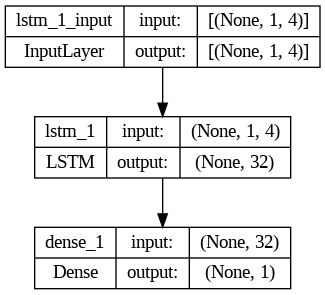

In [29]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)


In [30]:
history=lstm.fit(X_train, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False)

#history = lstm.fit(
   # X_train,       # Input data (features) for training
    #y_train,       # Target data (labels) for training
    #epochs=100,    # Number of training epochs (iterations over the entire dataset)
    #batch_size=8,  # Number of samples per gradient update (controls weight updates)
    #verbose=1,     # Verbosity mode (0: silent, 1: progress bar, 2: one line per epoch)
    #shuffle=False  # Whether to shuffle the data before each epoch (False in this case)
#)

Epoch 1/200
29/29 [==============================] - 4s 7ms/step - loss: 1235061.8750
Epoch 2/200
29/29 [==============================] - 0s 2ms/step - loss: 1234826.2500
Epoch 3/200
29/29 [==============================] - 0s 2ms/step - loss: 1234500.6250
Epoch 4/200
29/29 [==============================] - 0s 3ms/step - loss: 1234033.1250
Epoch 5/200
29/29 [==============================] - 0s 3ms/step - loss: 1233360.2500
Epoch 6/200
29/29 [==============================] - 0s 3ms/step - loss: 1232411.5000
Epoch 7/200
29/29 [==============================] - 0s 3ms/step - loss: 1231108.7500
Epoch 8/200
29/29 [==============================] - 0s 3ms/step - loss: 1229385.5000
Epoch 9/200
29/29 [==============================] - 0s 3ms/step - loss: 1227198.0000
Epoch 10/200
29/29 [==============================] - 0s 2ms/step - loss: 1224516.8750
Epoch 11/200
29/29 [==============================] - 0s 3ms/step - loss: 1221325.0000
Epoch 12/200
29/29 [==============================] 

In [32]:
#LSTM Prediction
y_pred= lstm.predict(X_test)
y_pred

1/1 [==============================] - 0s 37ms/step


array([[1555.1   ],
       [1527.7399],
       [1606.8893],
       [1514.3137],
       [1479.6593],
       [1466.1014],
       [1495.7686],
       [1492.3159],
       [1490.2361],
       [1461.2705],
       [1482.5287],
       [1500.2583],
       [1551.7241],
       [1563.395 ],
       [1528.1039],
       [1473.9518],
       [1437.5615],
       [1467.7849],
       [1484.7551],
       [1521.8868],
       [1538.8467],
       [1571.7413],
       [1510.9425]], dtype=float32)

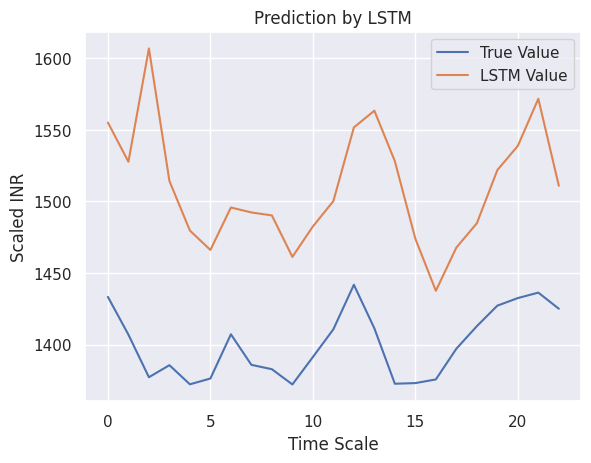

In [33]:
#Predicted vs True Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled INR')
plt.legend()
plt.show()